# Hello, World
This is the dog breed classifying machine learning model.

In [1]:
# Kaggle setup
!pip install kaggle
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset
License(s): other
stanford-dogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:

# Python Imports
import zipfile
import pandas as pd
import numpy as np
import scipy
import xml.etree.ElementTree as ET
import skimage as ski
import imageio.v3 as iio
import matplotlib.pyplot as plt
# import kagglehub
import os
# from dotenv import load_dotenv




# load_dotenv()
# print(os.environ.get('KAGGLE_USERNAME'))

# path = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")

### Unzipping file takes about 1 minute locally

In [3]:
# Unzip file for use
with zipfile.ZipFile("stanford-dogs-dataset.zip", "r") as z:
  z.extractall("sd_dataset")



In [17]:
def parseSet(setPath:str):
  # For each item in the set path
  allFolders = os.listdir(setPath)
  setCollection = {}
  for aFolder in allFolders:
    folderItems = []
    for anItem in os.listdir(os.path.join(setPath, aFolder)):
      folderItems.append(anItem)
    setCollection[aFolder] = folderItems
  return setCollection

def parseAnnotations(annotations:dict):
  labelImageSet = {}
  for key, value in annotations.items():
    breedCode = key.split("-", 1)[0]
    breedName = key.split("-", 1)[1]
    breedName = breedName.replace("-", " ")
    breedName = breedName.replace("_", " ").title()
    labelImageSet[key] = {"name": breedName, "code":breedCode}
  return labelImageSet

def parseImages(labels:dict, images:dict, imagePath:str):
  for id, imageSet in images.items():
    resizedSet = []
    for anImgage in imageSet:
      # Regular image
      # im = iio.imread(os.path.join(imagePath, id, anImgage))
      # Set to grayscale for optimization?
      im = ski.io.imread(os.path.join(imagePath, id, anImgage), as_gray=True)
      # im = ski.io.imread(os.path.join(imagePath, id, anImgage))
      # Resize for optimization?
      im = ski.transform.resize(im,(300, 300))
      # r = ski.transform.rotate(im, 45)
      # print(im.shape)
      # ax[0].imshow(im)
      # ax[1].imshow(r)
      resizedSet.append(im)
      
    labels[id].update({"images": resizedSet})
  return labels

def parseImagesOpt(labels:dict, images:dict, imagePath:str):
  resizedSet = []
  for id, imageSet in images.items():
    # print(imageSet)
    imgCollection = ski.io.imread_collection(f'{os.path.join(imagePath, '*')}', conserve_memory=True)
    # ic = ImageCollection('/tmp/*.png', load_func=imread_convert)
    resizedSet.append(imgCollection)
  return resizedSet
    
  

### Parsing the data for formatting and prepparing the images takes about 11 minutes locally

In [20]:
# Get paths
label_dir = './sd_dataset/annotations/Annotation/'
input_dir = './sd_dataset/images/Images/'

labels_pre = parseSet(label_dir)
inputs_pre = parseSet(input_dir)

# Organize data into data structures
labels = parseAnnotations(labels_pre)

# Combine annotations and images
# dataSet = parseImages(labels, inputs_pre, input_dir)
dataSet = parseImagesOpt(labels_pre, inputs_pre, input_dir)
print(dataSet)




[<skimage.io.collection.ImageCollection object at 0x000001991035B9B0>, <skimage.io.collection.ImageCollection object at 0x00000199101F7350>, <skimage.io.collection.ImageCollection object at 0x000001990FC95E50>, <skimage.io.collection.ImageCollection object at 0x0000019910245400>, <skimage.io.collection.ImageCollection object at 0x000001991021B9B0>, <skimage.io.collection.ImageCollection object at 0x000001990F530D10>, <skimage.io.collection.ImageCollection object at 0x000001991035A030>, <skimage.io.collection.ImageCollection object at 0x000001991035BB30>, <skimage.io.collection.ImageCollection object at 0x000001990FC627B0>, <skimage.io.collection.ImageCollection object at 0x000001990FC639E0>, <skimage.io.collection.ImageCollection object at 0x000001991033A810>, <skimage.io.collection.ImageCollection object at 0x000001991033BE30>, <skimage.io.collection.ImageCollection object at 0x000001991033AB70>, <skimage.io.collection.ImageCollection object at 0x0000019910339760>, <skimage.io.collect

In [87]:
# Show example summary of dataset
def showData():
  for breed, breedData in dataSet.items():
    print('%s: %s images' % (breedData['name'], len(breedData['images'])))
    for i in range(5):
      print(breedData['images'][i])
      plt.figure()
      plt.imshow(breedData['images'][i])


0.03814539891923117


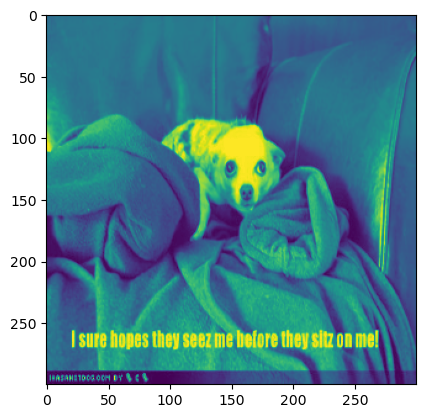

In [88]:
'''
key, value of dataSet.items()
=> "breedCode-breedName": {
  'name': "Breed Name",
  'code': "Breed Code",
  'images': [
    3D array N x N x 3; [X-coord][Y-coord][RBG]
  ]
}
'''
# showData()
# print(dataSet["n02085620-Chihuahua"]["images"][0])
print(dataSet["n02085620-Chihuahua"]["images"][0][0][0])
plt.figure()
plt.imshow(dataSet["n02085620-Chihuahua"]["images"][110])

In [89]:
labels = []
data = []
# print(dataSet)
for breed, breedData in dataSet.items():
  # labels.append(breedData['name'])
  currentBreed = breedData['name']
  for sampleDogImg in breedData['images']:
  # print(breedData['name'])
  # for i in range(1):
    labels.append(currentBreed)
    # print(len(sampleDogItem))
    data.append(sampleDogImg)

# Current data set, expecting 20580 points of data
# print(len(labels))
# print(len(data))



In [90]:
# data = np.array(data).flatten()
for i in range(len(data)):
  data[i] = np.array(data[i]).flatten()
print(len(data))
print('=====')
print(len(labels))

20580
=====
20580


In [91]:
# Let's get training
from sklearn.ensemble import HistGradientBoostingClassifier
hgbsc = HistGradientBoostingClassifier()
hgbsc.fit(data, labels)



MemoryError: Unable to allocate 177. MiB for an array with shape (2058, 90000) and data type uint8

In [83]:
hgbsc.predict(data)

array(['Chihuahua', 'Chihuahua', 'Chihuahua', ..., 'African Hunting Dog',
       'African Hunting Dog', 'African Hunting Dog'], dtype='<U30')

In [ ]:
!mkdir toClassify

A subdirectory or file toClassify already exists.


['dog01.jpeg', 'dog02.jpeg', 'dog03.png', 'n02085620_242.jpg']
[[1.         1.         1.         ... 0.99607843 1.         1.        ]
 [1.         1.         1.         ... 0.99607843 1.         1.        ]
 [1.         1.         1.         ... 0.99607843 1.         1.        ]
 ...
 [1.         1.         1.         ... 0.99607843 1.         1.        ]
 [1.         1.         1.         ... 0.99607843 1.         1.        ]
 [1.         1.         1.         ... 0.99607843 1.         1.        ]]
[[0.64139137 0.64139137 0.64139137 ... 0.62176078 0.62147804 0.62147804]
 [0.64531294 0.64531294 0.64531294 ... 0.62176078 0.62147804 0.62147804]
 [0.64923451 0.64923451 0.64923451 ... 0.62539961 0.62539961 0.62539961]
 ...
 [0.69360078 0.6639098  0.62918118 ... 0.64287333 0.6493098  0.73303882]
 [0.66360431 0.60534627 0.57565529 ... 0.6493098  0.60952078 0.67841961]
 [0.63501451 0.55322706 0.48880745 ... 0.5871302  0.51568588 0.56720902]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]

array(['Brittany Spaniel', 'Welsh Springer Spaniel', 'Standard Poodle',
       'Chihuahua'], dtype='<U30')

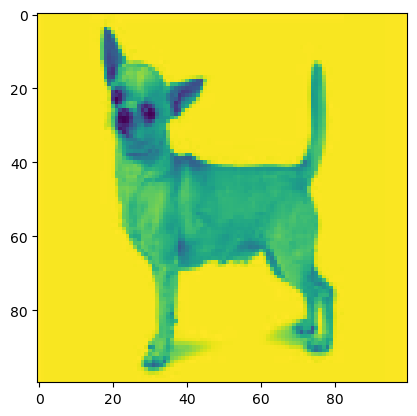

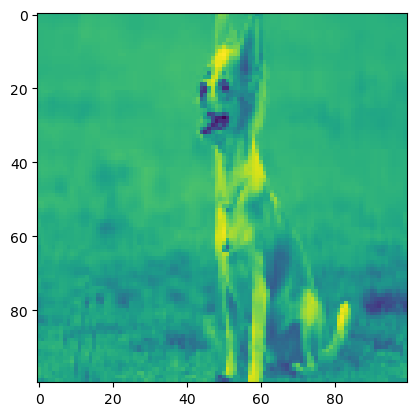

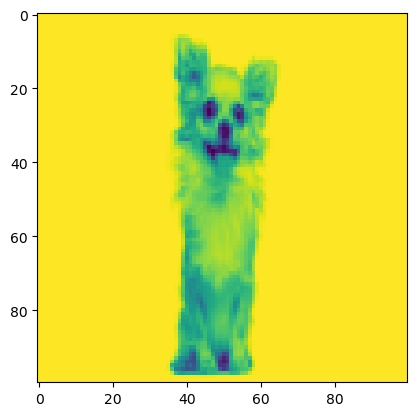

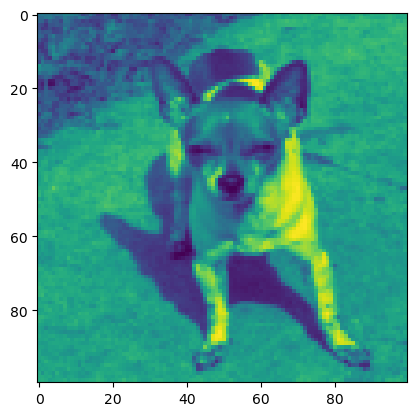

In [84]:
toClassifyList = os.listdir('./toClassify/')
print(toClassifyList)
resizedSet = []
for image in toClassifyList:   
  # print(image)
  # Regular image
  regim = ski.io.imread(os.path.join('./toClassify/', image))
  im = ski.io.imread(os.path.join('./toClassify/', image), as_gray=True)
  # Resize for optimization?
  r = ski.transform.resize(im,(100, 100))
  print(im)
  # r = ski.transform.rotate(im, 45)
  # print(im.shape)
  plt.figure()
  plt.imshow(r)
  # plt.show(r)
  resizedSet.append(np.array(r).flatten())
  
hgbsc.predict(resizedSet)